In [103]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet
from keras.datasets import mnist
from common.functions import softmax

In [104]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = mnist.load_data()

# 1次元へ整形
x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)

# 正規化
x_train, x_test = x_train.astype(np.float32) / 255.0, x_test.astype(np.float32) / 255.0

In [105]:
x_base = x_train[0].copy()
x_base

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

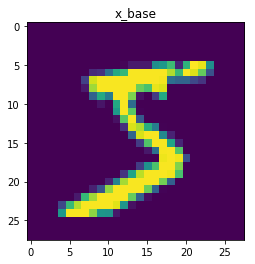

In [106]:
plt.imshow(x_base.reshape(28,28))
plt.title("x_base")
plt.show()

In [107]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# パラメータのロード
network.load_params("params_nn.pkl")
print("loaded Network Parameters!")

loaded Network Parameters!


In [108]:
pred = network.predict(x_base)
pred

array([-0.85297713, -3.66424245, -0.18508496,  9.85418412, -8.86099437,
       13.11292996, -6.54674727, -0.99105145, -2.4386287 ,  0.65709932])

In [109]:
pred_label = np.argmax(pred)
pred_label

5

In [110]:
pred_score = max(softmax(pred))
pred_score

0.9629792385831452

In [111]:
x = x_base.copy().reshape(1, 784)

In [112]:
grads = network.gradient(x, np.array([5]))
grads

{'W1': array([[ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -0.00000

In [113]:
np.set_printoptions(threshold=np.inf)
print(grads['W1'])

[[ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.0000

In [114]:
print(grads['W1'].shape)

(784, 50)


In [115]:
affine1 = network.layers['Affine1']

In [116]:
z = affine1.forward(x) - network.params['b1']
z.shape

(1, 50)

In [117]:
params1 = network.params['W1']
params1.shape

(784, 50)

In [118]:
f = params1 + np.sign(grads['W1'])*0.01

In [139]:
np.linalg.pinv(f).shape

(50, 784)

In [124]:
a = np.dot(z, np.linalg.pinv(f))
a

array([[-8.54451539e-02, -8.38406715e-02,  2.55594540e-01,
        -2.54733577e-01, -1.36482570e-01,  2.25347314e-02,
         3.33394032e-01, -1.89265521e-01,  8.19640817e-02,
        -2.60453890e-01, -1.85902438e-01, -2.20345900e-02,
        -4.10445031e-01,  1.29969093e-01,  3.00970241e-02,
        -6.14444792e-02, -2.96004926e-01,  1.64840219e-01,
         1.59599602e-01, -6.56933078e-03,  1.91682667e-01,
        -8.63028520e-02,  2.45560811e-01, -3.85394745e-01,
         8.23624232e-02,  4.05093968e-01,  1.28635800e-01,
        -1.32345333e-01, -7.42266374e-02, -1.51950350e-01,
         2.07005470e-01,  2.49552219e-01, -2.50561500e-01,
         3.38671563e-01,  1.46896567e-01, -4.39669067e-01,
         4.55183999e-01,  3.24534148e-02, -2.24042341e-01,
        -1.27886218e-01,  9.54057793e-02,  6.82180427e-02,
         2.07150822e-01,  3.12998876e-01,  3.40560888e-02,
         1.79101978e-01,  2.51456355e-01, -8.41017223e-02,
        -2.40119273e-01,  1.58662976e-02, -4.34528718e-0

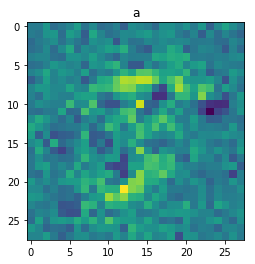

In [123]:
plt.imshow(a.reshape(28,28))
plt.title("a")
plt.show()

In [127]:
adv = x + a
adv = adv.clip(min=0, max=1)
adv

array([[0.        , 0.        , 0.25559454, 0.        , 0.        ,
        0.02253473, 0.33339403, 0.        , 0.08196408, 0.        ,
        0.        , 0.        , 0.        , 0.12996909, 0.03009702,
        0.        , 0.        , 0.16484022, 0.1595996 , 0.        ,
        0.19168267, 0.        , 0.24556081, 0.        , 0.08236242,
        0.40509397, 0.1286358 , 0.        , 0.        , 0.        ,
        0.20700547, 0.24955222, 0.        , 0.33867156, 0.14689657,
        0.        , 0.455184  , 0.03245341, 0.        , 0.        ,
        0.09540578, 0.06821804, 0.20715082, 0.31299888, 0.03405609,
        0.17910198, 0.25145635, 0.        , 0.        , 0.0158663 ,
        0.        , 0.07882   , 0.        , 0.02553713, 0.        ,
        0.        , 0.        , 0.        , 0.00230902, 0.15288047,
        0.        , 0.04842378, 0.        , 0.        , 0.19206662,
        0.07439714, 0.17215444, 0.        , 0.07726808, 0.        ,
        0.        , 0.05598692, 0.        , 0.12

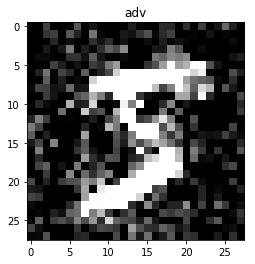

In [128]:
plt.imshow(adv.reshape(28,28), 'gray')
plt.title("adv")
plt.show()

In [136]:
pred_adv = network.predict(adv)
pred_adv

array([[ -0.61536202,  -5.95152659,   1.15165694,  13.35217949,
        -10.35350957,  10.1080997 ,  -8.53277092,  -3.41734083,
          3.56839931,   0.96680608]])

In [130]:
pred_adv_label = np.argmax(pred_adv)
pred_adv_label

3

In [138]:
pred_adv_score = max(softmax(pred_adv[0]))
pred_adv_score

0.9623982150464023